# Aqib Javed 
## 18101101

### Question 1(1) 

IMPORTING LIBRARIES

In [43]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns 

file_name = "trial.xlsx"
sheet_title = "trial"
df = pd.read_excel(file_name ,  sheet_name =  sheet_title )

In [44]:
shape = tuple(df.shape)
print ("Rows in the Dataset - " + str(shape[0]))
print ("Coilumns in the Dataset - " + str(shape[1]))

Rows in the Dataset - 776
Coilumns in the Dataset - 18


In [45]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [46]:
new_data = df
target_column = "Risk"
print("SUMMARY STATISTICS - Risk \n")
print(new_data.Risk.describe())

def transform_target(row) :
    if row[target_column] == 0 :
        return 0
    else :
        return 1 ##  Since median in 3 , the NaN will be tranformed into 3
    
target_transform = new_data.apply(lambda row : transform_target(row), axis=1)

new_data = new_data.drop(columns=["Risk"])


SUMMARY STATISTICS - Risk 

count    776.000000
mean       0.626289
std        0.484100
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Risk, dtype: float64


In [47]:
print("Sectors with Risk        - " + str(target_transform.sum()))
print("Sectors without Risk  " + str( 100 - int(target_transform.sum())) )

Sectors with Risk        - 486
Sectors without Risk  -386


In [48]:
## Looking at the summary statistics
new_data = new_data.drop(columns=["LOCATION_ID"])

summary_statistics = new_data.describe()
summary_statistics.loc["Var"] = new_data.var()
summary_statistics.loc["Type"] = new_data.dtypes
summary_statistics = summary_statistics.transpose()
summary_statistics.sort_values(by = "Var").head(10)


,count,mean,std,min,25%,50%,75%,max,Var,Type
Loss,776,0.0296392,0.18428,0,0,0,0,2,0.0339591,int64
numbers,776,5.06765,0.264449,5,5,5,5,9,0.0699331,float64
LOSS_SCORE,776,2.06186,0.37508,2,2,2,2,6,0.140685,int64
History,776,0.104381,0.531031,0,0,0,0,9,0.281994,int64
History_score,776,2.16753,0.679869,2,2,2,2,6,0.462221,int64
Marks,776,2.23711,0.803517,2,2,2,2,6,0.64564,int64
Score,776,2.70258,0.858923,2,2,2.4,3.25,5.2,0.737748,float64
District,776,2.50515,1.22868,2,2,2,2,6,1.50965,int64
MONEY_Marks,776,2.90979,1.59745,2,2,2,4,6,2.55185,int64
SCORE_B,776,3.13144,1.69804,2,2,2,4,6,2.88335,int64


In [49]:
columns_to_drop = list( summary_statistics.loc[summary_statistics["Var"] <=5 ].index )
new_data = new_data.drop(columns = columns_to_drop)
print("Number of columns having variance < 5 - " + str(len(columns_to_drop) ))

Number of columns having variance < 5 - 11


In [50]:
corr_matrix = new_data.corr().abs()
corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in corr_matrix_upper.columns if any(corr_matrix_upper[column] > 0.9)]
print("Number of columns having correlation > +0.90 - " + str(len(to_drop) ))
new_data = new_data.drop(columns=to_drop)

Number of columns having correlation > +0.90 - 1


In [51]:
column_skewness = new_data.skew().sort_values(ascending = False)
zero_columns_df = ( len(new_data) - new_data.fillna(0).astype(bool).sum() ).sort_values(ascending = False )
features_removal_df = pd.concat([zero_columns_df,column_skewness],axis=1)
features_removal_df.sort_values(by=0 , ascending=False).head(10)
columns_remove = list(zero_columns_df[ zero_columns_df > 70 ].index)
print("Number of columns having zero values percentage > 70% - " + str(len(columns_remove)) )

Number of columns having zero values percentage > 70% - 3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
print("\nFinal # of Features - " + str(len(list(new_data))))

summary_statistics.loc[list(new_data)]


Final # of Features - 4


,count,mean,std,min,25%,50%,75%,max,Var,Type
Sector_score,776,20.1845,24.319,1.85,2.37,3.89,55.57,59.85,591.415,float64
PARA_A,776,2.45019,5.67887,0,0.21,0.875,2.48,85,32.2496,float64
PARA_B,776,10.8,50.0836,0,0,0.405,4.16,1264.63,2508.37,float64
Money_Value,775,14.1376,66.6065,0,0,0.09,5.595,935.03,4436.43,float64


In [53]:
nullValues = new_data.isna().sum()
columns_with_null = list(nullValues[nullValues > 0].index)
print("\nColumns Containing Missing Values = " + str(len(columns_with_null)) + "\n")
print("\n".join(columns_with_null))

print("Imputing missing values with Median \n")
new_data_imputed = new_data
new_data_imputed.fillna(new_data_imputed.median(), inplace=True)

shape = tuple(new_data_imputed.shape)
print ("Rows in the Imputed Dataset - " + str(shape[0]))
print ("Coilumns in the Imputed Dataset - " + str(shape[1]))


Columns Containing Missing Values = 1

Money_Value
Imputing missing values with Median 

Rows in the Imputed Dataset - 776
Coilumns in the Imputed Dataset - 4


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_names = list(new_data_imputed.columns)
new_data_imputed[col_names] = scaler.fit_transform(new_data_imputed[col_names])
print("\nImputed and MIX Max Tranformation Variable Summary")
new_data_imputed.describe().transpose().head(10)


Imputed and MIX Max Tranformation Variable Summary


,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,0.316113,0.419293,0.0,0.008966,0.035172,0.926207,1.0
PARA_A,776.0,0.028826,0.066810,0.0,0.002471,0.010294,0.029176,1.0
PARA_B,776.0,0.008540,0.039603,0.0,0.000000,0.000320,0.003289,1.0
Money_Value,776.0,0.015101,0.071191,0.0,0.000000,0.000096,0.005976,1.0


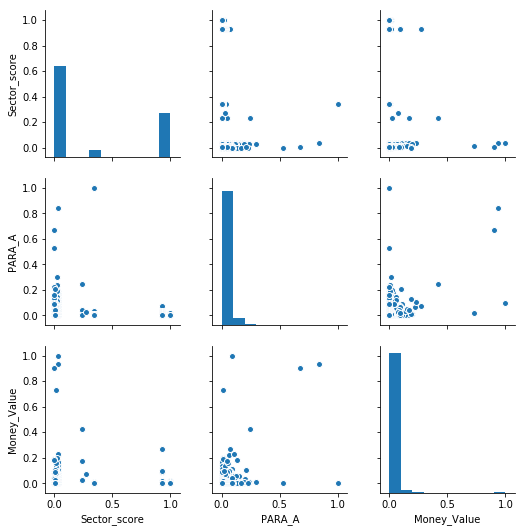

In [55]:
variables_of_interest = [ 'Sector_score','PARA_A','Money_Value']
sns.pairplot(new_data[variables_of_interest])

### Part 2 

In [59]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

sector_data = new_data_imputed

In [60]:
sector_data=sector_data.drop('Sector_score',axis=1)

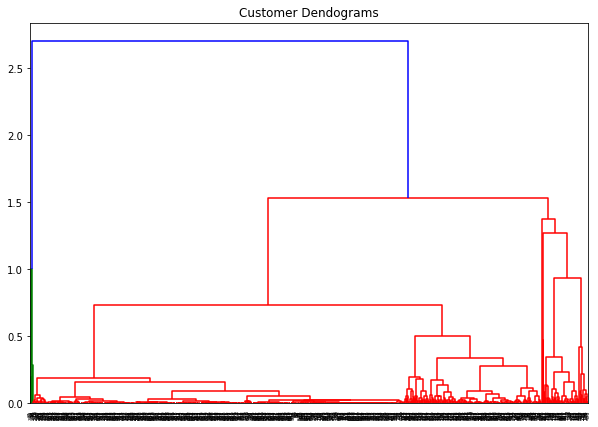

In [62]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(sector_data, method='ward'))  

In [64]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 
cluster.fit_predict(sector_data)  
print(cluster.labels_)

[2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1
 2 1 0 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1
 2 1 2 2 2 2 2 0 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 2 2 1 2 2 2
 2 2 2 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2
 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 1 2 2 2 2 2 2 

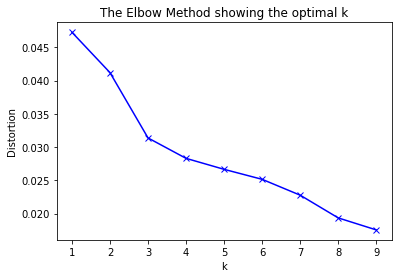

In [65]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
X=sector_data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [66]:
kmeanModel = KMeans(n_clusters=4).fit(X)

In [67]:
kmeanModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
kmeanModel.fit_predict(X)  
print(kmeanModel.labels_)

[0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 2 0 0 2 2 0 2 0 2 2 0 2 0 0 0 0 0 0 0 0 2
 0 2 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2
 0 2 0 0 0 0 0 1 0 0 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0
 0 2 0 0 0 0 0 0 0 2 0 0 2 0 2 0 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 0 2 2 0 0 0
 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 0 2 0 2 0 2 0 2 2 0 2
 0 0 0 2 2 0 0 0 2 2 0 0 0 2 2 0 0 0 0 3 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 2 0 0 0 2 2 0 0 0 0 0
 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0
 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

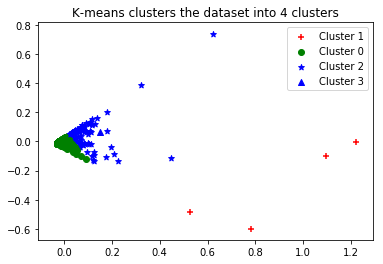

In [71]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if kmeanModel.labels_[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif kmeanModel.labels_[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif kmeanModel.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    elif kmeanModel.labels_[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='^')
pl.legend([c1, c2, c3,c4],['Cluster 1', 'Cluster 0','Cluster 2','Cluster 3'])
pl.title('K-means clusters the dataset into 4 clusters')
pl.show()

### Part 3 

In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data_imputed, target_transform, test_size = 0.3, random_state = 0)
print("Train set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Train set has 543 samples.
Testing set has 233 samples.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
#RANDOM FOREST
#Import Library
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor for regression problem
from sklearn.metrics import fbeta_score, accuracy_score
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
X=new_data_imputed
y=target_transform
# Create Random Forest object
Rmodel= RandomForestClassifier()
# Train the model using the training sets and check score
model.fit(X, y)
#Predict Output
predicted= model.predict(X_test)
model_accuracy = accuracy_score(y_test, predicted)
print("\nRandom Forest Model accuracy:", model_accuracy)


Random Forest Model accuracy: 0.9699570815450643


In [75]:
#GRADIENT BOOSTING
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier().fit(X_train, y_train)
# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "\nGradient Boosting Model accuracy:", model_accuracy)


Gradient Boosting Model accuracy: 0.9184549356223176


In [76]:
#ADAPTIVE BOOSTING
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train, y_train)

# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
print( "\nAdaptive boost Model accuracy:", model_accuracy)


Adaptive boost Model accuracy: 0.9313304721030042


Random Forest Model have the best Accuraccy accuracy: 0.9828326180257511

#### Feature Importance

In [88]:
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import visuals as vs

# TODO: Train the supervised model on the training set 
model = GradientBoostingClassifier().fit(X_train, y_train)

importances = model.feature_importances_


# show scores
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)
model_fscore = fbeta_score(y_test, predictions, beta=0.5)
print( "\nModel accuracy:", model_accuracy, ", fscore: ", model_fscore)

# show most importance features
a = np.array(importances)
factors = pd.DataFrame(data = np.array([importances.astype(float), X.columns]).T,
                       columns = ['importances', 'features'])
factors = factors.sort_values('importances', ascending=False)

print ("\n Top important features")
display(factors)


Model accuracy: 0.9184549356223176 , fscore:  0.9293948126801153

 Top important features


,importances,features
1,0.436497,PARA_A
3,0.227457,Money_Value
2,0.212884,PARA_B
0,0.123163,Sector_score


So I tried Random forest, gradiant boost and adptive boost and the best accuracy is given by random forest

#### Part 4

In [92]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

beta = 0.5

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=101)

# TODO: Create the parameters list you wish to tune
parameters = {'solver': ['newton-cg', 'lbfgs', 'sag'],
              'C': [0.01, 0.1, 1.0, 10.0, 100.0]
             }

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=beta)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print( "Unoptimized model\n------")
print( "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print( "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print( "\nOptimized Model\n------")
print( "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print( "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

# show best parameters
print ("\nBest Classifier\n------")
print (best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.7082
F-score on testing data: 0.7368

Optimized Model
------
Final accuracy score on the testing data: 0.8455
Final F-score on the testing data: 0.8668

Best Classifier
------
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### The Model is tune

## ---------------------------------------------------- The End ----------------------------------------------------------- 